In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
price_df=pd.read_csv('gld_price_data.csv')

In [85]:
price_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [87]:
price_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [89]:
price_df.shape

(2290, 6)

In [91]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [93]:
price_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

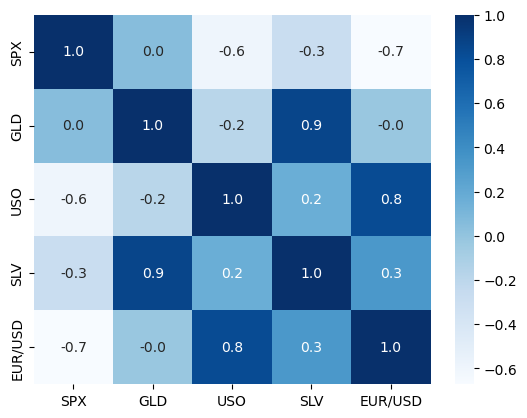

In [95]:
sns.heatmap(price_df.corr(numeric_only=True),annot=True,cbar=True,fmt='.1f',cmap='Blues')

<Axes: xlabel='GLD', ylabel='Count'>

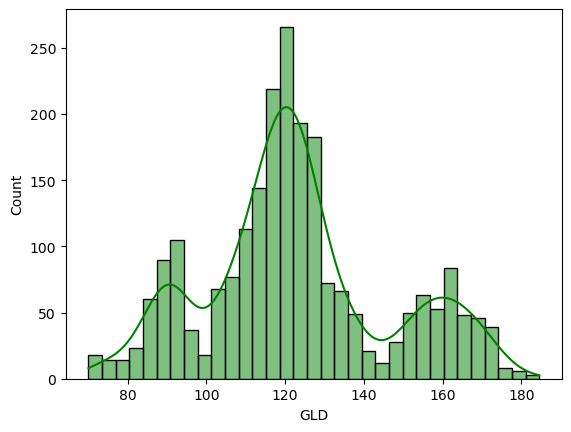

In [96]:
sns.histplot(price_df['GLD'],kde=True,color='green')

In [99]:
price_df['Date']=pd.to_datetime(price_df['Date'],infer_datetime_format=True,errors='coerce')

C:\Users\JESMA\AppData\Local\Temp\ipykernel_11140\553026563.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  price_df['Date']=pd.to_datetime(price_df['Date'],infer_datetime_format=True,errors='coerce')


In [101]:
price_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


In [117]:
price_df.dtypes

Date         int32
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [119]:
X=price_df.drop('GLD',axis=1)
y=price_df['GLD']

In [121]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [127]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [131]:
lr_pred=lr.predict(X_test)
lr_train=round(lr.score(X_train,y_train)*100,2)
lr_r2score=round(r2_score(y_test,lr_pred)*100,2)
lr_mae=mean_absolute_error(y_test,lr_pred)
lr_mse=mean_squared_error(y_test,lr_pred)

In [133]:
print('Training Score :',lr_train)
print('R2 Score :',lr_r2score)
print('MAE :',lr_mae)
print('MSE :',lr_mse)

Training Score : 87.77
R2 Score : 89.59
MAE : 5.856872466948725
MSE : 56.33809101294444


In [135]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [137]:
dtr_pred=dtr.predict(X_test)
dtr_train=round(dtr.score(X_train,y_train)*100,2)
dtr_r2score=round(r2_score(y_test,dtr_pred)*100,2)
dtr_mae=mean_absolute_error(y_test,dtr_pred)
dtr_mse=mean_squared_error(y_test,dtr_pred)

In [139]:
print('Training Score :',dtr_train)
print('R2 Score :',dtr_r2score)
print('MAE :',dtr_mae)
print('MSE :',dtr_mse)

Training Score : 100.0
R2 Score : 97.89
MAE : 1.5536762227074228
MSE : 11.393529424438631


In [141]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [143]:
rfr_pred=dtr.predict(X_test)
rfr_train=round(rfr.score(X_train,y_train)*100,2)
rfr_r2score=round(r2_score(y_test,rfr_pred)*100,2)
rfr_mae=mean_absolute_error(y_test,rfr_pred)
rfr_mse=mean_squared_error(y_test,rfr_pred)

In [145]:
print('Training Score :',rfr_train)
print('R2 Score :',rfr_r2score)
print('MAE :',rfr_mae)
print('MSE :',rfr_mse)

Training Score : 99.85
R2 Score : 97.89
MAE : 1.5536762227074228
MSE : 11.393529424438631


In [147]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [149]:
gbr_pred=dtr.predict(X_test)
gbr_train=round(gbr.score(X_train,y_train)*100,2)
gbr_r2score=round(r2_score(y_test,gbr_pred)*100,2)
gbr_mae=mean_absolute_error(y_test,gbr_pred)
gbr_mse=mean_squared_error(y_test,gbr_pred)

In [151]:
print('Training Score :',gbr_train)
print('R2 Score :',gbr_r2score)
print('MAE :',gbr_mae)
print('MSE :',gbr_mse)

Training Score : 98.69
R2 Score : 97.89
MAE : 1.5536762227074228
MSE : 11.393529424438631


In [153]:
model=pd.DataFrame({
    'Model':['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor'],
    'Training Score':[lr_train,dtr_train,rfr_train,gbr_train],
    'R2-Score':[lr_r2score,dtr_r2score,rfr_r2score,gbr_r2score]
})

In [155]:
model.sort_values(by='R2-Score')

,Model,Training Score,R2-Score
0,LinearRegression,87.77,89.59
1,DecisionTreeRegressor,100.00,97.89
2,RandomForestRegressor,99.85,97.89
3,GradientBoostingRegressor,98.69,97.89
